In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/tonyfischetti/InteractiveLogisticRegression/master/moons.csv')
df

,X1,X2,Y
0,0.997072,-0.764072,1
1,-0.040078,-0.349546,1
2,0.818753,0.829183,0
3,1.211097,-0.471013,1
4,0.933354,-0.200320,1
...,...,...,...
295,1.533223,-0.131914,1
296,-0.180141,-0.183182,1
297,-0.549083,0.126187,0
298,0.682335,1.345413,0


## 데이터 분포 산포도로 찍어보기

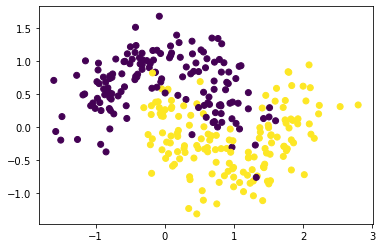

In [4]:
plt.scatter(df['X1'],df['X2'],c=df['Y'])

## KNN by hands

### KNN 구현
- 알고리즘 : 주어진 데이터 X에 대하여 x와 가장 가까운 K개의 이웃을 구하고, 이들의 결과를 평균내어 예측
- 데이터프레임을 numpy array 형태로 변환하고 X라고 명칭

In [6]:
X=np.array(df[['X1','X2']])
y=np.array(df['Y'])
X, y

(array([[ 9.970720e-01, -7.640720e-01],
        [-4.007800e-02, -3.495460e-01],
        [ 8.187530e-01,  8.291830e-01],
        [ 1.211097e+00, -4.710130e-01],
        [ 9.333540e-01, -2.003200e-01],
        [-1.262734e+00, -1.927520e-01],
        [ 1.472114e+00, -3.982010e-01],
        [ 8.960100e-01, -3.292670e-01],
        [ 7.138550e-01,  6.942590e-01],
        [-9.593200e-01,  9.652270e-01],
        [ 1.741027e+00,  1.045110e-01],
        [ 8.137430e-01,  3.162650e-01],
        [ 1.399380e-01, -5.695160e-01],
        [ 1.282374e+00, -1.046759e+00],
        [ 1.081902e+00, -3.321400e-02],
        [-3.207730e-01,  1.015594e+00],
        [ 1.596947e+00,  3.888480e-01],
        [-7.088810e-01,  1.027186e+00],
        [ 1.082953e+00, -8.459300e-01],
        [ 2.002340e-01,  1.576210e-01],
        [ 5.665950e-01,  1.560000e-04],
        [ 8.357900e-02,  1.225781e+00],
        [-9.750180e-01,  4.312260e-01],
        [-5.825010e-01,  6.058820e-01],
        [ 1.139353e+00, -9.836980e-01],


- 다음과 같은 데이터가 들어왔을 때 어떻게 예측하는지 궁금

In [7]:
new_x = np.array([1, -1])

- 데이터 간에 거리는 아래와 같이 구할 수 있음

In [9]:
# ex 첫번째 데이터와 새로운 데이터 간에 거리 
np.sqrt(np.sum((new_x-X[0,:])**2))

0.23594616836897356

- new_x와 모든 데이터 사이 거리 구하기
- numpy 계산을 브로드캐스팅 규칙을 이용해 모든 점과 첫번째 데이터 사이의 거리를 쉽게 구할 수 있음
- result의 결과값 확인

In [10]:
result = np.sqrt(np.sum((new_x-X)**2,axis=1))
result

array([0.23594617, 1.22672436, 1.83814062, 0.56955174, 0.80245236,
       2.40241847, 0.76488801, 0.6787464 , 1.71825275, 2.77507694,
       1.33006224, 1.32937776, 0.96178122, 0.28621929, 0.97024899,
       2.40978432, 1.51170251, 2.65136896, 0.17498219, 1.4070224 ,
       1.09002382, 2.40705806, 2.43907851, 2.25458786, 0.14030329,
       2.27272774, 0.84571474, 1.81142886, 0.57754589, 1.47638868,
       2.46033531, 1.9765546 , 1.10582964, 2.59997945, 0.78126468,
       1.83633172, 1.37473479, 1.41015917, 1.82779389, 1.3851657 ,
       0.43379481, 2.45510473, 2.2946647 , 1.59356865, 1.57458253,
       2.23931827, 0.08941036, 1.90782348, 1.05173626, 2.03201119,
       1.97922846, 1.00929056, 1.52267408, 2.52227483, 2.36687155,
       1.00721399, 1.5451189 , 0.68989356, 2.01706837, 1.77934335,
       2.20836458, 3.11313707, 2.41096584, 1.99538363, 1.73898184,
       0.92223116, 1.29640338, 2.45511366, 1.24709016, 2.21744853,
       1.8235392 , 0.61546738, 1.54674525, 1.34887611, 2.03849

- numpy의 argsort를 이용해서 각 데이터를 오름차순으로 정렬했을 때 각 데이터의 순위가 어떻게 되는지 반환
  - `argsort()` : array를 오름차순 정렬했을 때 각 원소의 원래 index 반환
- 나와 가장 가까운 순서로 k개의 데이터는 다음과 같이 구함

In [11]:
ordered_result = result.argsort()
ordered_result

array([ 46,  24,  18,   0, 142,  87,  13,  83, 135, 210, 178, 201, 158,
       170, 105, 195, 106, 107,  40,  75,  84, 150, 175, 257, 114, 190,
       290,   3, 188,  28, 152,  71, 253, 252, 216, 153, 292,   7, 183,
        57, 109, 264, 275, 172,   6,  34,  82, 160,  98, 243, 200,   4,
       272,  26, 208,  89,  88, 218, 101, 186,  65, 278, 220, 163,  86,
        12, 286, 177,  14,  93, 223, 276, 241,  55,  51, 270, 295, 137,
       122, 174, 136, 263,  48, 231, 100, 157, 251,  20,  32, 139, 221,
       247,  78, 225, 143, 284, 291, 234, 294, 126, 265, 281, 164, 119,
       283, 268,   1, 214, 110,  99,  68, 127, 293, 228, 116, 140,  66,
       103,  11,  10, 192,  90,  73, 166, 209,  36, 151,  39, 282, 129,
       289, 229, 203, 197,  19,  37, 280, 245,  92, 296, 261, 182,  29,
       146, 144, 117,  16,  52, 162,  56,  72, 246, 238, 260,  44, 299,
       269, 254, 191,  43, 128,  81,  76, 193, 259, 273, 240,  97, 154,
       108,   8, 235,  64, 131,  95,  59,  94, 115,  27,  70,  3

In [12]:
# 가까운 순위가 5보다 작은 것 ( fancy indexing )
X[ordered_result[:5]]

array([[ 0.996094, -0.910675],
       [ 1.139353, -0.983698],
       [ 1.082953, -0.84593 ],
       [ 0.997072, -0.764072],
       [ 0.786693, -0.843328]])

- 위를 이용해 가까운 5개의 데이터 y의 평균 값 구함

In [14]:
y[ordered_result[:5]].mean()
# 따라서 1로 분류

1.0

## sklearn 이용

In [16]:
from sklearn.metrics import pairwise_distances


In [17]:
# 모든 데이터 사이의 거리
dist=pairwise_distances(new_x.reshape(1,-1),X)[0]
dist

array([0.23594617, 1.22672436, 1.83814062, 0.56955174, 0.80245236,
       2.40241847, 0.76488801, 0.6787464 , 1.71825275, 2.77507694,
       1.33006224, 1.32937776, 0.96178122, 0.28621929, 0.97024899,
       2.40978432, 1.51170251, 2.65136896, 0.17498219, 1.4070224 ,
       1.09002382, 2.40705806, 2.43907851, 2.25458786, 0.14030329,
       2.27272774, 0.84571474, 1.81142886, 0.57754589, 1.47638868,
       2.46033531, 1.9765546 , 1.10582964, 2.59997945, 0.78126468,
       1.83633172, 1.37473479, 1.41015917, 1.82779389, 1.3851657 ,
       0.43379481, 2.45510473, 2.2946647 , 1.59356865, 1.57458253,
       2.23931827, 0.08941036, 1.90782348, 1.05173626, 2.03201119,
       1.97922846, 1.00929056, 1.52267408, 2.52227483, 2.36687155,
       1.00721399, 1.5451189 , 0.68989356, 2.01706837, 1.77934335,
       2.20836458, 3.11313707, 2.41096584, 1.99538363, 1.73898184,
       0.92223116, 1.29640338, 2.45511366, 1.24709016, 2.21744853,
       1.8235392 , 0.61546738, 1.54674525, 1.34887611, 2.03849

In [18]:
y[dist.argsort()[:5]].mean()

1.0

### sklearn KNeighborsClassifier 사용

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
classifier = KNeighborsClassifier(n_neighbors = 5)

In [32]:
training_x = df.iloc[:,:2]
training_y = df.iloc[:,-1]
training_x, training_y

(           X1        X2
 0    0.997072 -0.764072
 1   -0.040078 -0.349546
 2    0.818753  0.829183
 3    1.211097 -0.471013
 4    0.933354 -0.200320
 ..        ...       ...
 295  1.533223 -0.131914
 296 -0.180141 -0.183182
 297 -0.549083  0.126187
 298  0.682335  1.345413
 299  0.101210  0.299019
 
 [300 rows x 2 columns],
 0      1
 1      1
 2      0
 3      1
 4      1
       ..
 295    1
 296    1
 297    0
 298    0
 299    1
 Name: Y, Length: 300, dtype: int64)

In [33]:
classifier.fit(training_x, training_y)

KNeighborsClassifier()

In [39]:
guesses = classifier.predict(new_x.reshape(1, -1))
guesses

/usr/local/Caskroom/miniconda/base/envs/da/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])